### Import Necessary Libraries

In [1]:
#Data Handling
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset (CSV)

In [2]:
df = pd.read_csv('train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

### Observations:

- There are 22 columns and 7109 rows of data in the dataset. The columns consists data from ID to features to Target varibales. 
    - PRT_ID doesn't matter to have. (drop)
- The columns are of different types from Categorical(Binary and Ordinal) to Numberical(Discrete and Continuous)

### Different Variables:
    - Dataset contains most of the data to predict the Target variable (Sales Price)
    - AREA: Place where the House is built
    - INT_SQFT: Size of the House
    - DATE_SALE: When the house was sold
    - DIST_MAINROAD: Distance from the Main Road
    - N_BEDROOM: No of Bedrooms in the House
    - N_BATHROOM: No of Bathrooms in the House
    - SALE_COND: Condition of the House when Sold
    - PARK_FACIL: Availability of Parking Facilities
    - DATE_BUILT: When was the House built
    - BUILDTYPE: 
    - UTILITY_AVAIL: Amenities available around the house
    - STREET: Type of street the house is at
    - MZZONE: Type of Zone
    - 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS': Doesn't seems important
    - SALES_PRICE: Price of the House 

- Two Date Columns (DATE_SALE, DATE_BUILD) should be converted to DateTime format.
- String Object columns must be encoded if they are necessary to predict the Target.

### Explore and Analyze the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.isna().sum()
#There are few columns with Nan/Missing values

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


#### Observations:
- Apart from some NaN or Missing values, other stats looks just fine. 
- We will explore more on that while Processing the data column by column

In [8]:
df.DATE_SALE.min(), df.DATE_SALE.max()

('01-01-2005', '31-12-2014')

## Prepare the Dataset for ML Model

### EDA
### Data Cleaning

#### AREA

In [9]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [10]:
df['AREA'].replace(['Karapakkam', 'Karapakam'],'Karapakkam', inplace=True)
df['AREA'].replace(['Anna Nagar', 'Ana Nagar', 'Ann Nagar'], 'Anna Nagar', inplace=True)
df['AREA'].replace(['Velachery', 'Velchery'], 'Velachery',inplace=True)
df['AREA'].replace(['Chrompet','Chrompt', 'Chrmpet', 'Chormpet'], 'Chrompet',inplace=True)
df['AREA'].replace(['KK Nagar', 'KKNagar'], 'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar', 'T Nagar'], 'T Nagar',  inplace=True)
df['AREA'].replace( ['Adyr', 'Adyar'], 'Adyar',inplace=True)    

df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

#### INT_SQFT

In [12]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [13]:
df.INT_SQFT.isnull().sum()

0

#### DATE_SALE

In [14]:
type(df.DATE_SALE[1])

str

In [15]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\3952003312.py:1: UserWarning: Parsing '19-12-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\3952003312.py:1: UserWarning: Parsing '13-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\3952003312.py:1: UserWarning: Parsing '13-03-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\3952003312.py:1: UserWarning: Parsing '22-06-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
C:\Users\amin0\AppDa

In [16]:
type(df.DATE_SALE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df.DATE_SALE.isnull().sum()

0

#### DIST_MAINROAD

In [18]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [19]:
df.DIST_MAINROAD.isnull().sum()

0

#### N_BEDROOM

In [20]:
df.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [21]:
df.N_BEDROOM.isnull().sum()

1

In [22]:
df.N_BEDROOM.mode()

0    1.0
Name: N_BEDROOM, dtype: float64

In [23]:
df.N_BEDROOM.fillna(df.N_BEDROOM.mode()[0], inplace=True)


In [24]:
df.N_BEDROOM.isnull().sum()

0

In [25]:
df = df.astype({"N_BEDROOM":"int"})

In [26]:
type(df.N_BEDROOM[1])

numpy.int32

#### N_BATHROOM

In [27]:
df.N_BATHROOM.describe()

count    7104.000000
mean        1.213260
std         0.409639
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [28]:
df.N_BATHROOM.isnull().sum()

5

In [29]:
df.N_BATHROOM.mode()

0    1.0
Name: N_BATHROOM, dtype: float64

In [30]:
df.N_BATHROOM.fillna(df.N_BATHROOM.mode()[0], inplace=True)

In [31]:
df.N_BATHROOM.isnull().sum()

0

In [32]:
df = df.astype({"N_BATHROOM":"int"})

In [33]:
type(df.N_BATHROOM[1])

numpy.int32

#### N_ROOM

In [34]:
df.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [35]:
df.N_ROOM.isnull().sum()

0

#### SALE_COND

In [36]:
df.SALE_COND.describe()

count        7109
unique          9
top       AdjLand
freq         1433
Name: SALE_COND, dtype: object

In [37]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [38]:
df.SALE_COND.replace(['Ab Normal'],'AbNormal', inplace=True)
df.SALE_COND.replace(['Partiall', 'PartiaLl'],'Partial', inplace=True)
df.SALE_COND.replace(['Adj Land'],'AdjLand', inplace=True)

#### PARK_FACIL

In [39]:
df.PARK_FACIL.describe()

count     7109
unique       3
top        Yes
freq      3587
Name: PARK_FACIL, dtype: object

In [40]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [41]:
df.PARK_FACIL.replace(['Noo','No'], 0, inplace=True)
df.PARK_FACIL.replace('Yes',1, inplace=True)

In [42]:
df.PARK_FACIL.unique()

array([1, 0], dtype=int64)

#### DATE_BUILD

In [43]:
type(df.DATE_BUILD[1])

str

In [44]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)

C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '15-05-1967' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '22-12-1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '18-03-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '13-10-1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\A

C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '18-02-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '28-07-1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '13-04-1960' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\589113778.py:1: UserWarning: Parsing '14-04-1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
C:\Users\amin0\A

In [45]:
type(df.DATE_BUILD[1])

pandas._libs.tslibs.timestamps.Timestamp

#### BUILDTYPE

In [46]:
df.BUILDTYPE.describe()

count      7109
unique        5
top       House
freq       2444
Name: BUILDTYPE, dtype: object

In [47]:
df.BUILDTYPE.isnull().sum()

0

In [48]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [49]:
df.BUILDTYPE.replace('Other','Others', inplace=True)
df.BUILDTYPE.replace('Comercial','Commercial', inplace=True)
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

#### UTILITY_AVAIL

In [50]:
df.UTILITY_AVAIL.describe()

count       7109
unique         5
top       AllPub
freq        1886
Name: UTILITY_AVAIL, dtype: object

In [51]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [52]:
df.UTILITY_AVAIL.replace('All Pub', 'AllPub', inplace=True)
df.UTILITY_AVAIL.replace('NoSewr ', 'NoSewr', inplace=True)
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [53]:
df.UTILITY_AVAIL.isnull().sum()

0

#### STREET

In [54]:
df.STREET.describe()

count      7109
unique        5
top       Paved
freq       2560
Name: STREET, dtype: object

In [55]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [56]:
df.STREET.replace('Pavd','Paved', inplace=True)
df.STREET.replace('No Access', 'NoAccess', inplace=True)
df.STREET.unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [57]:
df.STREET.isnull().sum()

0

#### MZZONE

In [58]:
df.MZZONE.describe()

count     7109
unique       6
top         RL
freq      1858
Name: MZZONE, dtype: object

In [59]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [60]:
df.MZZONE.isnull().sum()

0

### Drop Columns that are Irrelevant

In [61]:
df = df.drop(['PRT_ID','QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS'],1)

C:\Users\amin0\AppData\Local\Temp\ipykernel_8024\2664902474.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['PRT_ID','QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS'],1)


In [62]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE'],
      dtype='object')

 #### SALES_PRICE

In [63]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [64]:
df.SALES_PRICE.isnull().sum()

0

In [65]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-09-02,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Others,AllPub,Gravel,C,7406250


In [66]:
df.to_csv('CleanedDF.csv')

### Feature Engineering

- With DATE_BUILD and DATE_SALE, we can get two new features such as Age when it was sold (AGE_SOLD) and Year of sale (YEARSOLD)
- Assumption: Since, year after year the price might alter due to inflation.

In [67]:
yr = []
for i in range(len(df.DATE_BUILD)):
    r = (df.DATE_SALE[i] - df.DATE_BUILD[i]) / np.timedelta64(1, 'Y')
    yr.append(round(r))
yr

df['AGE_SOLD'] = yr

In [68]:
df['YEARSOLD'] = df.DATE_SALE.dt.year

In [69]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_SOLD,YEARSOLD
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,7600000,44,2011
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,11,2006
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-09-02,Commercial,ELO,Gravel,RL,13159200,20,2012
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Others,NoSewr,Paved,I,9630290,22,2010
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Others,AllPub,Gravel,C,7406250,30,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,0,1962-01-15,Others,ELO,NoAccess,RM,5353000,49,2011
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,1,1995-11-04,Others,NoSeWa,NoAccess,RH,10818480,9,2004
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,0,1978-01-09,House,NoSeWa,Gravel,I,8351410,29,2006
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,1,1977-11-08,Commercial,ELO,Paved,RL,8507000,31,2009


In [70]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_SOLD', 'YEARSOLD'],
      dtype='object')

### Data Viz
    - Distribution of the Feature Plots
    - Feature Vs Target Variable(SALES_PRICE)
    - Check for Linearity & Coorelation
    - Interpret the Plots and Follow Through
### Features Plots

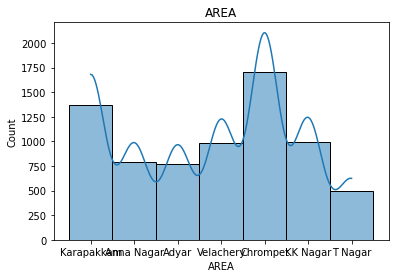

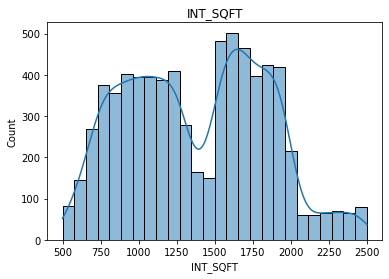

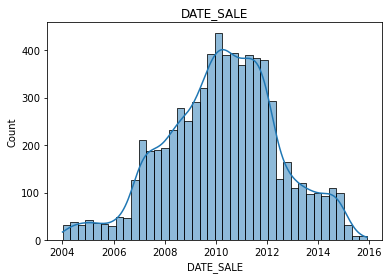

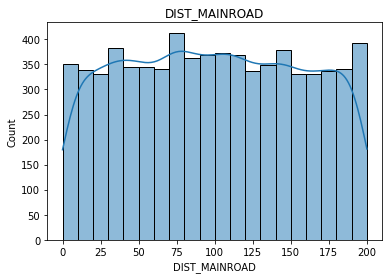

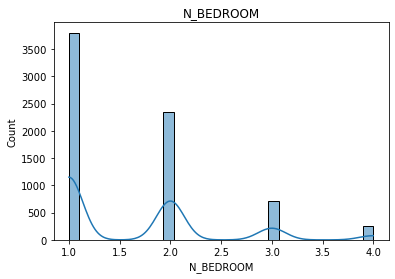

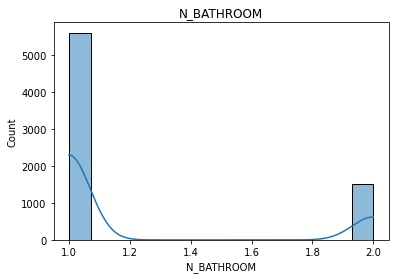

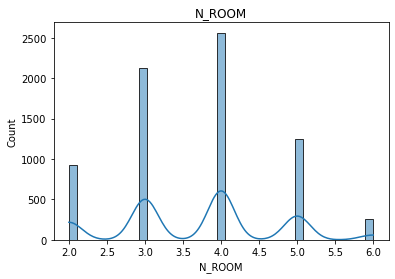

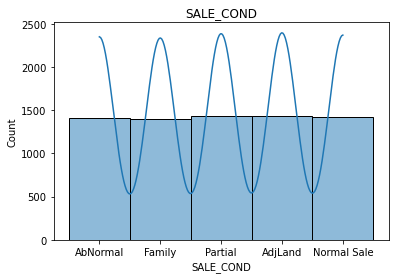

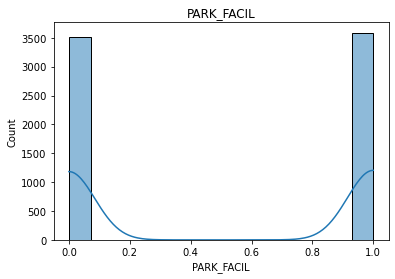

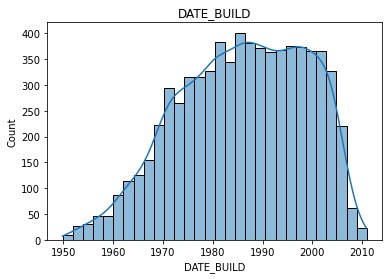

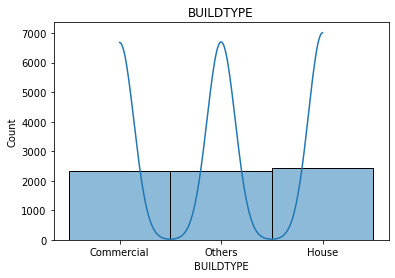

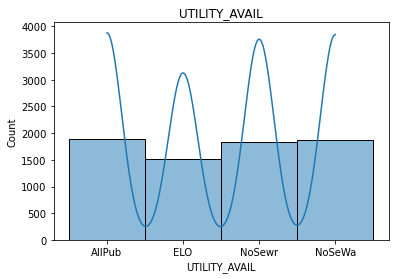

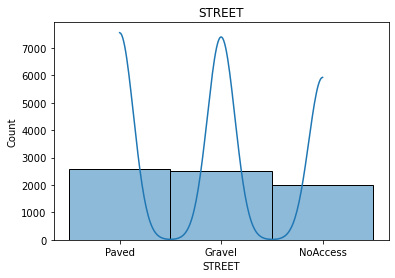

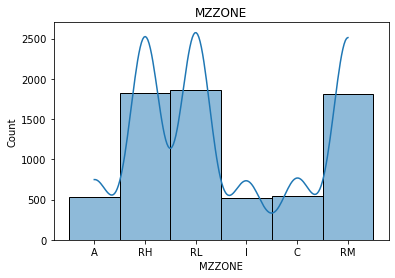

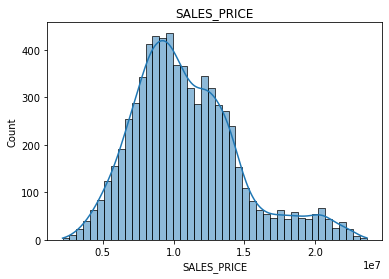

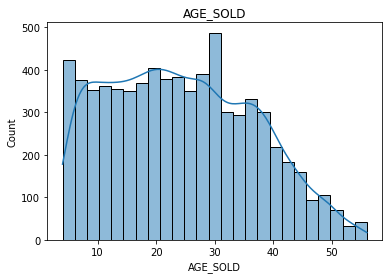

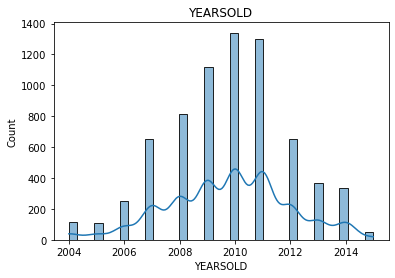

In [71]:
features = [ 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_SOLD', 'YEARSOLD']
#
for i in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'{i}')
    plt.xlabel(i)
    plt.xticks()
    plt.show()

### Feature Vs Target Variable(SALES_PRICE)

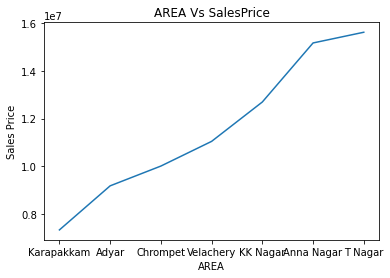

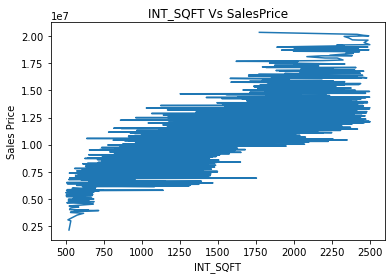

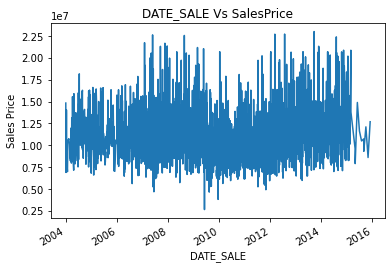

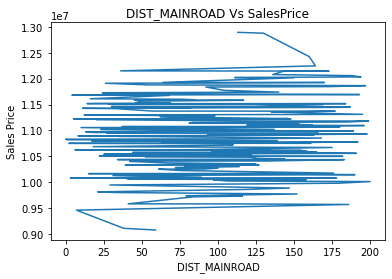

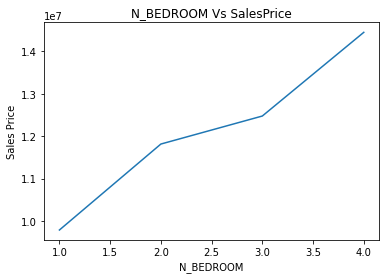

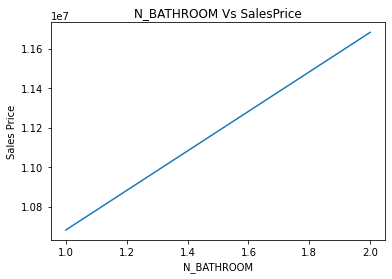

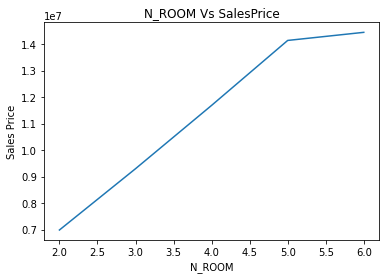

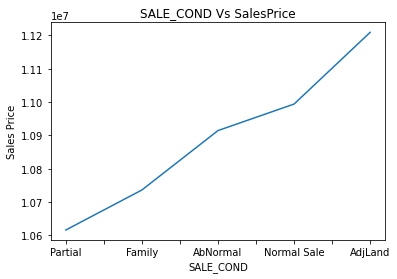

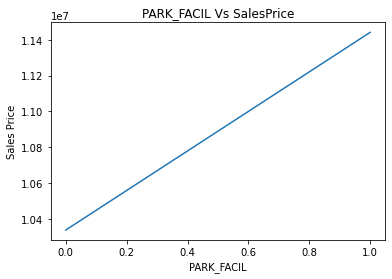

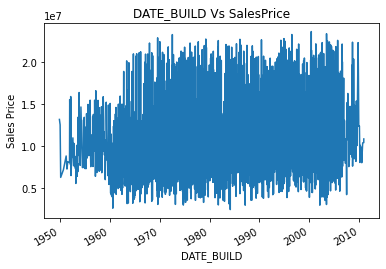

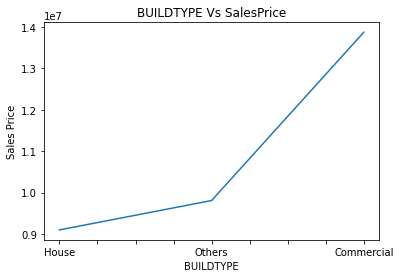

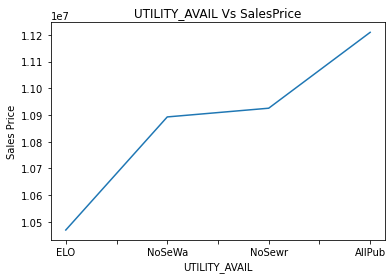

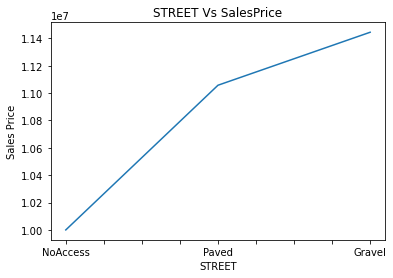

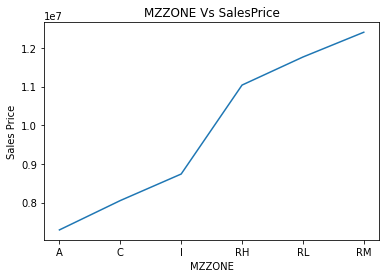

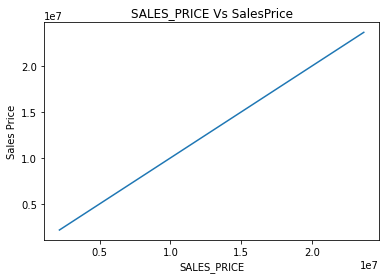

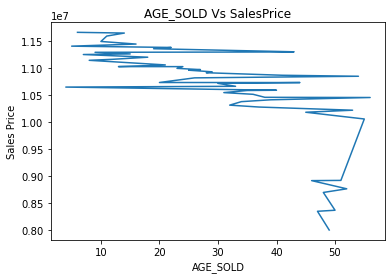

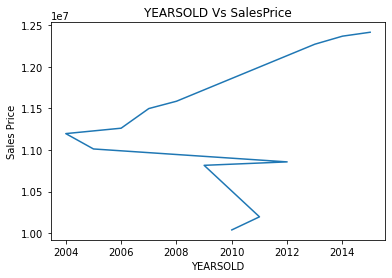

In [72]:
#Area
features = ['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_SOLD', 'YEARSOLD']
#
for i in features:
    plt.figure(figsize=(6,4))
    #sns.lineplot(data.groupby(i)['SALES_PRICE'].mean().sort_values())
    df.groupby(i)['SALES_PRICE'].mean().sort_values().plot()
    plt.title(f'{i} Vs SalesPrice')
    plt.xlabel(i)
    plt.ylabel('Sales Price')
    plt.xticks()
    plt.show()

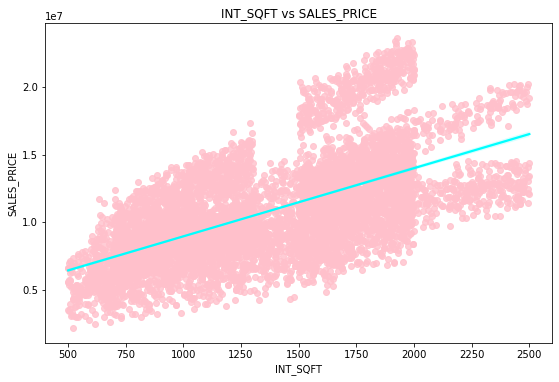

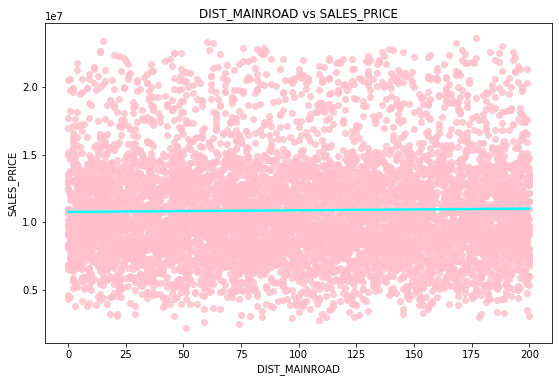

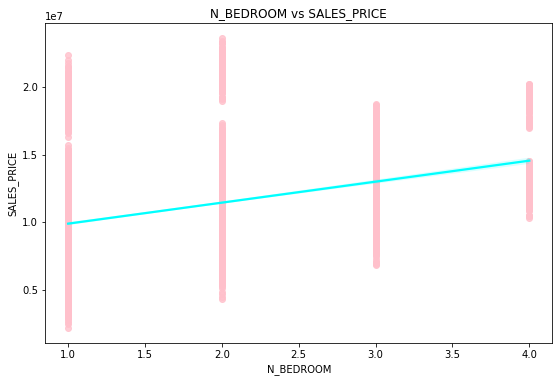

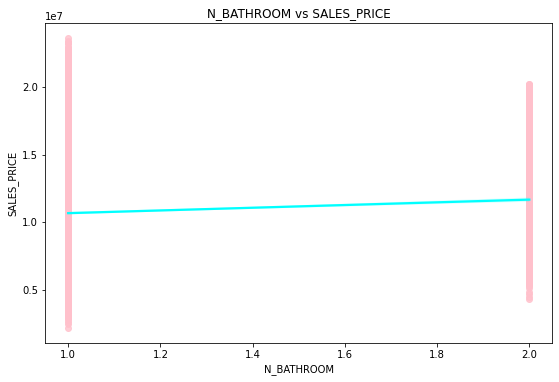

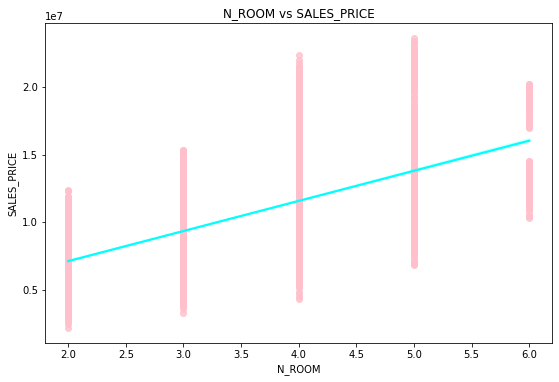

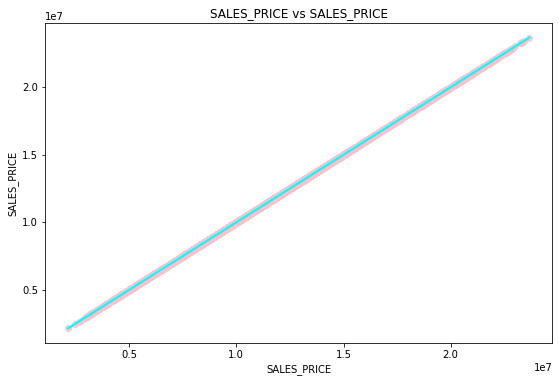

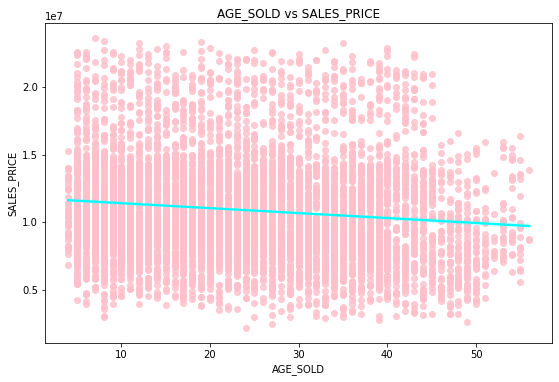

In [73]:
cols = ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
            'N_BATHROOM', 'N_ROOM', 'SALES_PRICE', 'AGE_SOLD']

for i in cols:
    plt.figure(figsize=(20,20))
    plt.subplot(321)
    #sns.set_palette("pastel")
    sns.regplot(x=df[i], y=df.SALES_PRICE, scatter_kws={'color': 'pink'}, line_kws={'color': 'cyan'})
    plt.title(f'{i} vs SALES_PRICE')

In [74]:
df.groupby(['AREA','YEARSOLD'])['SALES_PRICE'].mean().unstack()

YEARSOLD,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
AREA,,,,,,,,,,,,
Adyar,NaN,NaN,8.746863e+06,9.197362e+06,8.904410e+06,9.522208e+06,8.908762e+06,9.407279e+06,9.342331e+06,NaN,NaN,NaN
Anna Nagar,NaN,NaN,1.563846e+07,1.490089e+07,1.492801e+07,1.485661e+07,1.521311e+07,1.508869e+07,1.531258e+07,1.526250e+07,1.554422e+07,16574562.5
Chrompet,NaN,NaN,1.073026e+07,1.007992e+07,9.938185e+06,9.887968e+06,1.008706e+07,9.722622e+06,1.002970e+07,1.022875e+07,1.001138e+07,9510150.0
KK Nagar,NaN,NaN,NaN,NaN,1.294364e+07,1.279200e+07,1.239710e+07,1.272005e+07,1.253994e+07,NaN,NaN,NaN
Karapakkam,NaN,NaN,NaN,NaN,NaN,7.308603e+06,7.261738e+06,7.420928e+06,7.402385e+06,NaN,NaN,NaN
T Nagar,NaN,NaN,1.640728e+07,1.635266e+07,1.482822e+07,1.654978e+07,1.590352e+07,1.553971e+07,1.541786e+07,1.501815e+07,1.471552e+07,16539300.0
Velachery,1.119692e+07,1.101236e+07,1.095475e+07,1.078578e+07,1.099143e+07,1.105502e+07,1.128052e+07,1.120998e+07,1.071500e+07,NaN,NaN,NaN


In [75]:
df.groupby(['MZZONE','YEARSOLD'])['SALES_PRICE'].mean().unstack()

YEARSOLD,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
MZZONE,,,,,,,,,,,,
A,9.887919e+06,9.336202e+06,9.729067e+06,8.210464e+06,8.427060e+06,6.740295e+06,6.640539e+06,6.439233e+06,6.745071e+06,NaN,NaN,NaN
C,1.037351e+07,9.584373e+06,9.857596e+06,8.932840e+06,8.687839e+06,8.058407e+06,7.207718e+06,7.597640e+06,7.673938e+06,NaN,NaN,NaN
I,1.084279e+07,1.135065e+07,1.012660e+07,9.519296e+06,9.711156e+06,8.726456e+06,8.072774e+06,8.133626e+06,8.027424e+06,NaN,NaN,NaN
RH,1.174934e+07,1.161162e+07,1.137853e+07,1.154032e+07,1.146063e+07,1.125923e+07,1.019168e+07,1.071532e+07,1.100622e+07,1.167847e+07,1.167316e+07,9.712505e+06
RL,1.242011e+07,1.183126e+07,1.193905e+07,1.196036e+07,1.200751e+07,1.164382e+07,1.140571e+07,1.131809e+07,1.203679e+07,1.218890e+07,1.214225e+07,1.356329e+07
RM,1.243414e+07,1.197670e+07,1.301541e+07,1.310547e+07,1.277569e+07,1.233597e+07,1.189650e+07,1.186473e+07,1.210698e+07,1.280070e+07,1.312939e+07,1.447774e+07


- This is to understand does the price change year after year regarding Area or MZZONE. 

<Figure size 864x720 with 0 Axes>

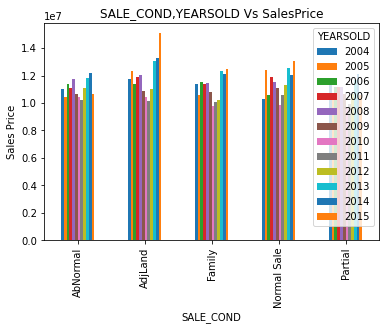

In [76]:
plt.figure(figsize=(12,10))

df.groupby(['SALE_COND','YEARSOLD'])['SALES_PRICE'].mean().unstack().plot(kind='bar')
plt.title(f'SALE_COND,YEARSOLD Vs SalesPrice')
#plt.xlabel(i)
plt.ylabel('Sales Price')
plt.xticks()
plt.show()


In [77]:
df.groupby(['BUILDTYPE','YEARSOLD'])['SALES_PRICE'].mean().unstack()

YEARSOLD,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
BUILDTYPE,,,,,,,,,,,,
Commercial,1.433302e+07,1.441375e+07,1.416795e+07,1.498818e+07,1.494029e+07,1.374719e+07,1.275252e+07,1.282008e+07,1.382878e+07,1.525557e+07,1.559665e+07,1.635712e+07
House,8.907720e+06,9.514153e+06,9.101821e+06,9.474364e+06,9.634108e+06,9.111833e+06,8.297928e+06,8.642132e+06,9.098980e+06,1.038862e+07,1.046502e+07,9.329603e+06
Others,9.696968e+06,9.735736e+06,9.999122e+06,1.010174e+07,1.043481e+07,9.557651e+06,9.224216e+06,9.247990e+06,9.773303e+06,1.105775e+07,1.143533e+07,1.153595e+07


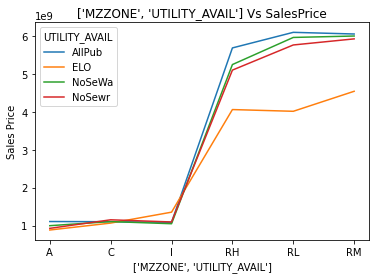

In [78]:
i = ['MZZONE', 'UTILITY_AVAIL']
df.groupby(['MZZONE', 'UTILITY_AVAIL'])['SALES_PRICE'].sum().unstack().plot()
plt.title(f'{i} Vs SalesPrice')
plt.xlabel(i)
plt.ylabel('Sales Price')
plt.xticks()
plt.show()

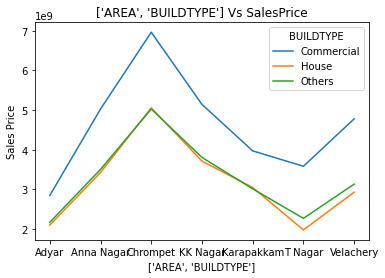

In [79]:
i = ['AREA', 'BUILDTYPE']
df.groupby(['AREA', 'BUILDTYPE'])['SALES_PRICE'].sum().unstack().plot()
plt.title(f'{i} Vs SalesPrice')
plt.xlabel(i)
plt.ylabel('Sales Price')
plt.xticks()
plt.show()

Text(0.5, 1.0, 'MZZONE VS SALES_PRICE')

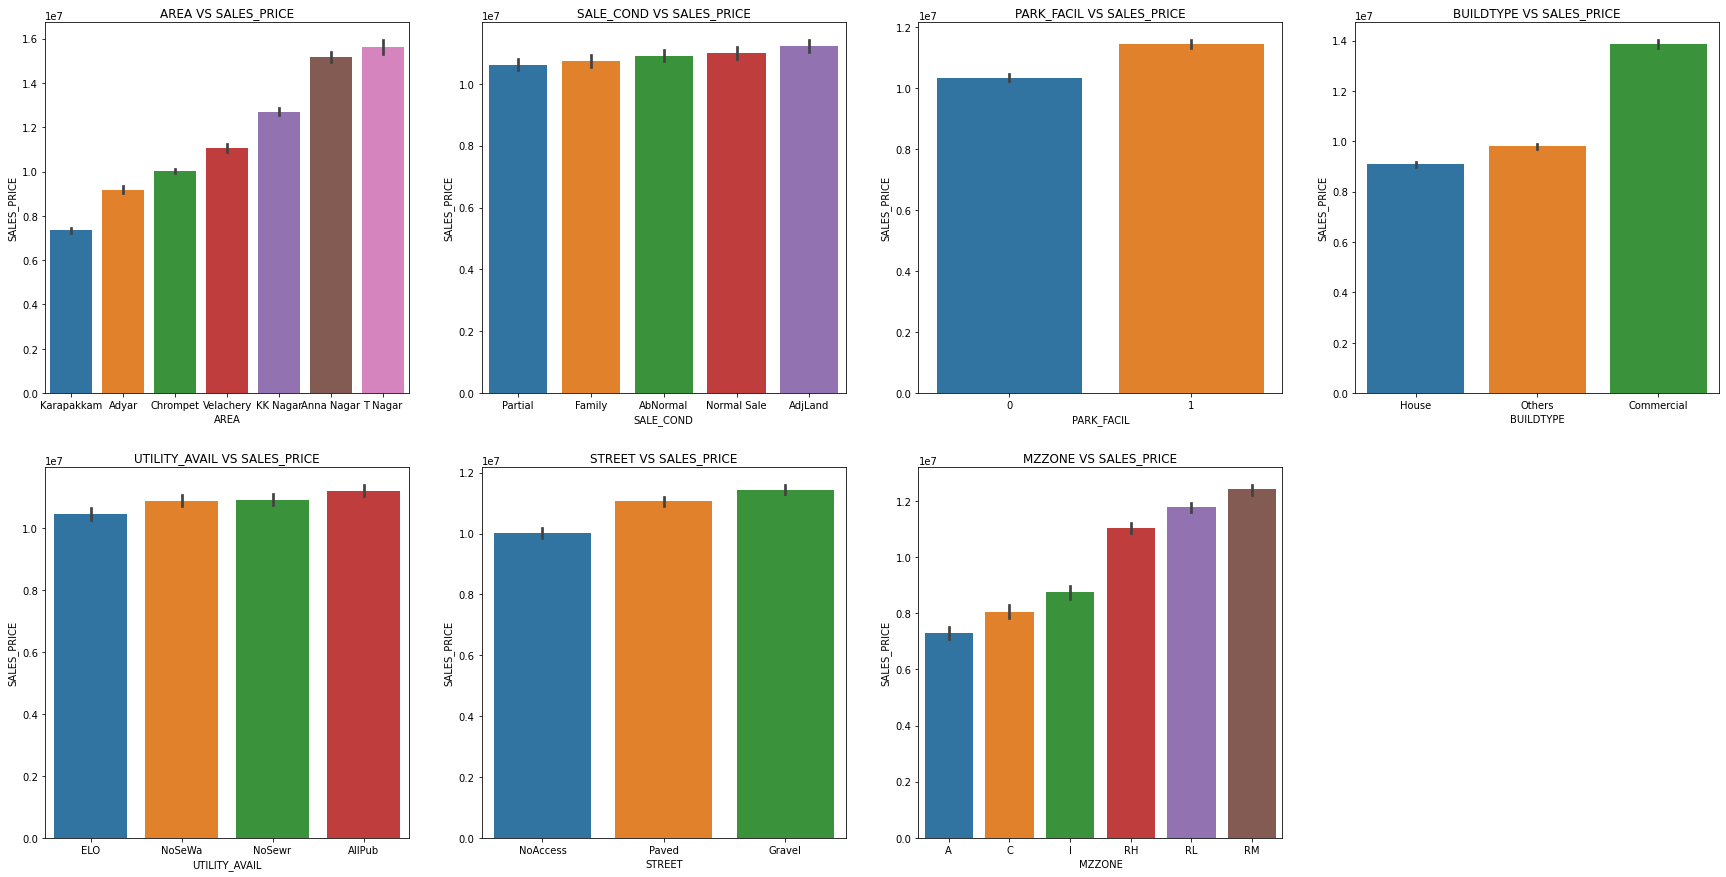

In [80]:
plt.figure(figsize=(30,15))

plt.subplot(241)
sns.barplot(x=df.AREA, y=df.SALES_PRICE, 
            order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA VS SALES_PRICE')

plt.subplot(242)
sns.barplot(x=df.SALE_COND, y=df.SALES_PRICE, 
            order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND VS SALES_PRICE')

plt.subplot(243)
sns.barplot(x=df.PARK_FACIL, y=df.SALES_PRICE, 
            order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL VS SALES_PRICE')

plt.subplot(244)
sns.barplot(x=df.BUILDTYPE, y=df.SALES_PRICE, 
            order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE VS SALES_PRICE')

plt.subplot(245)
sns.barplot(x=df.UTILITY_AVAIL, y=df.SALES_PRICE, 
            order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL VS SALES_PRICE')

plt.subplot(246)
sns.barplot(x=df.STREET, y=df.SALES_PRICE, 
            order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET VS SALES_PRICE')

plt.subplot(247)
sns.barplot(x=df.MZZONE, y=df.SALES_PRICE, 
            order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE VS SALES_PRICE')

## Encode Necessary Columns

In [81]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_SOLD,YEARSOLD
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,7600000,44,2011
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,11,2006
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-09-02,Commercial,ELO,Gravel,RL,13159200,20,2012
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Others,NoSewr,Paved,I,9630290,22,2010
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Others,AllPub,Gravel,C,7406250,30,2009


In [82]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_SOLD', 'YEARSOLD'],
      dtype='object')

In [83]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [84]:
df.groupby('AREA')['SALES_PRICE'].mean().sort_values()

AREA
Karapakkam    7.340100e+06
Adyar         9.185668e+06
Chrompet      1.001381e+07
Velachery     1.104735e+07
KK Nagar      1.269623e+07
Anna Nagar    1.516820e+07
T Nagar       1.561674e+07
Name: SALES_PRICE, dtype: float64

#### Sales Price changes with change in Area and it has been sorted with increase of price.

In [85]:
#Create a dict for mapping the ordinal numerical values
#dict1 = {'Karapakkam':0, 'Anna Nagar':5, 'Adyar':1, 'Velachery':3, 'Chrompet':2,
##df['AREA'] = df.AREA.map(dict1)


In [86]:
from sklearn.preprocessing import OrdinalEncoder

In [87]:
oe = OrdinalEncoder(categories=[['Karapakkam','Adyar','Chrompet','Velachery','KK Nagar','Anna Nagar','T Nagar'],
                               ['Partial','Family','AbNormal','Normal Sale','AdjLand']])
df[['AREA','SALE_COND']]= oe.fit_transform(df[['AREA','SALE_COND']])

In [88]:
#df.SALE_COND.unique()

In [89]:
#dict2 = {'AbNormal':2, 'Family':1, 'Partial':0, 'AdjLand':4, 'Normal Sale':3}
#df['SALE_COND'] = df.SALE_COND.map(dict2)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_SOLD,YEARSOLD
0,0.0,1004,2011-04-05,131,1,1,3,2.0,1,1967-05-15,Commercial,AllPub,Paved,A,7600000,44,2011
1,5.0,1986,2006-12-19,26,2,1,5,2.0,0,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,11,2006
2,1.0,909,2012-04-02,70,1,1,3,2.0,1,1992-09-02,Commercial,ELO,Gravel,RL,13159200,20,2012
3,3.0,1855,2010-03-13,14,3,2,5,1.0,0,1988-03-18,Others,NoSewr,Paved,I,9630290,22,2010
4,0.0,1226,2009-05-10,84,1,1,3,2.0,1,1979-10-13,Others,AllPub,Gravel,C,7406250,30,2009


In [90]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [91]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
ohe = OneHotEncoder(sparse=False)

In [93]:
ohe.fit_transform(df[['BUILDTYPE']])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [94]:
btohe = ohe.fit_transform(df[['BUILDTYPE']])

In [95]:
btohelb = ohe.categories_

In [96]:
btlb = np.array(btohelb).ravel()

In [97]:
btohedf = pd.DataFrame(btohe, columns=btlb)

In [98]:
btohedf.head()

,Commercial,House,Others
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [99]:
df = pd.concat([df, btohedf], axis=1)
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_SOLD,YEARSOLD,Commercial,House,Others
0,0.0,1004,2011-04-05,131,1,1,3,2.0,1,1967-05-15,Commercial,AllPub,Paved,A,7600000,44,2011,1.0,0.0,0.0
1,5.0,1986,2006-12-19,26,2,1,5,2.0,0,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,11,2006,1.0,0.0,0.0
2,1.0,909,2012-04-02,70,1,1,3,2.0,1,1992-09-02,Commercial,ELO,Gravel,RL,13159200,20,2012,1.0,0.0,0.0
3,3.0,1855,2010-03-13,14,3,2,5,1.0,0,1988-03-18,Others,NoSewr,Paved,I,9630290,22,2010,0.0,0.0,1.0
4,0.0,1226,2009-05-10,84,1,1,3,2.0,1,1979-10-13,Others,AllPub,Gravel,C,7406250,30,2009,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0.0,598,2011-03-01,51,1,1,2,4.0,0,1962-01-15,Others,ELO,NoAccess,RM,5353000,49,2011,0.0,0.0,1.0
7105,3.0,1897,2004-08-04,52,3,2,5,1.0,1,1995-11-04,Others,NoSeWa,NoAccess,RH,10818480,9,2004,0.0,0.0,1.0
7106,3.0,1614,2006-08-25,152,2,1,4,3.0,0,1978-01-09,House,NoSeWa,Gravel,I,8351410,29,2006,0.0,1.0,0.0
7107,0.0,787,2009-03-08,40,1,1,2,0.0,1,1977-11-08,Commercial,ELO,Paved,RL,8507000,31,2009,1.0,0.0,0.0


In [100]:
#df.BUILDTYPE.unique()

In [101]:
from sklearn.preprocessing import OrdinalEncoder

In [102]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [103]:
oe = OrdinalEncoder(categories=[['ELO', 'NoSeWa','NoSewr','AllPub'], ['NoAccess','Paved', 'Gravel'],
                               ['A', 'C', 'I', 'RH', 'RL','RM']])
df[['UTILITY_AVAIL', 'STREET', 'MZZONE']]=oe.fit_transform(df[['UTILITY_AVAIL', 'STREET', 'MZZONE']])

In [104]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_SOLD,YEARSOLD,Commercial,House,Others
0,0.0,1004,2011-04-05,131,1,1,3,2.0,1,1967-05-15,Commercial,3.0,1.0,0.0,7600000,44,2011,1.0,0.0,0.0
1,5.0,1986,2006-12-19,26,2,1,5,2.0,0,1995-12-22,Commercial,3.0,2.0,3.0,21717770,11,2006,1.0,0.0,0.0
2,1.0,909,2012-04-02,70,1,1,3,2.0,1,1992-09-02,Commercial,0.0,2.0,4.0,13159200,20,2012,1.0,0.0,0.0
3,3.0,1855,2010-03-13,14,3,2,5,1.0,0,1988-03-18,Others,2.0,1.0,2.0,9630290,22,2010,0.0,0.0,1.0
4,0.0,1226,2009-05-10,84,1,1,3,2.0,1,1979-10-13,Others,3.0,2.0,1.0,7406250,30,2009,0.0,0.0,1.0


In [105]:
df.drop(columns=['DATE_SALE', 'DIST_MAINROAD', 'DATE_BUILD','BUILDTYPE'], inplace=True)
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_SOLD,YEARSOLD,Commercial,House,Others
0,0.0,1004,1,1,3,2.0,1,3.0,1.0,0.0,7600000,44,2011,1.0,0.0,0.0
1,5.0,1986,2,1,5,2.0,0,3.0,2.0,3.0,21717770,11,2006,1.0,0.0,0.0
2,1.0,909,1,1,3,2.0,1,0.0,2.0,4.0,13159200,20,2012,1.0,0.0,0.0
3,3.0,1855,3,2,5,1.0,0,2.0,1.0,2.0,9630290,22,2010,0.0,0.0,1.0
4,0.0,1226,1,1,3,2.0,1,3.0,2.0,1.0,7406250,30,2009,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0.0,598,1,1,2,4.0,0,0.0,0.0,5.0,5353000,49,2011,0.0,0.0,1.0
7105,3.0,1897,3,2,5,1.0,1,1.0,0.0,3.0,10818480,9,2004,0.0,0.0,1.0
7106,3.0,1614,2,1,4,3.0,0,1.0,2.0,2.0,8351410,29,2006,0.0,1.0,0.0
7107,0.0,787,1,1,2,0.0,1,0.0,1.0,4.0,8507000,31,2009,1.0,0.0,0.0


In [106]:
df.to_csv('EncodedDF.csv')

## ML Modelling

## Linear Regression

In [107]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_SOLD', 'YEARSOLD', 'Commercial', 'House', 'Others'],
      dtype='object')

In [108]:
X = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE_SOLD', 
       'YEARSOLD', 'Commercial', 'House', 'Others']]

y = df['SALES_PRICE']

In [109]:
from sklearn import model_selection

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

R^2 Score:  0.9211815570121339


In [111]:
lrdata = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lrdata

,Actual,Predicted
2784,12151100,1.241497e+07
3532,10081500,1.175859e+07
5968,5358500,8.050309e+06
5747,12584475,1.248102e+07
2614,8555550,9.224294e+06
...,...,...
2525,13957390,1.461253e+07
1886,13709595,1.307262e+07
7015,5853875,5.209902e+06
880,10930680,1.177162e+07


In [112]:
lrm = metrics.r2_score(y_test, y_pred)

### Scalling

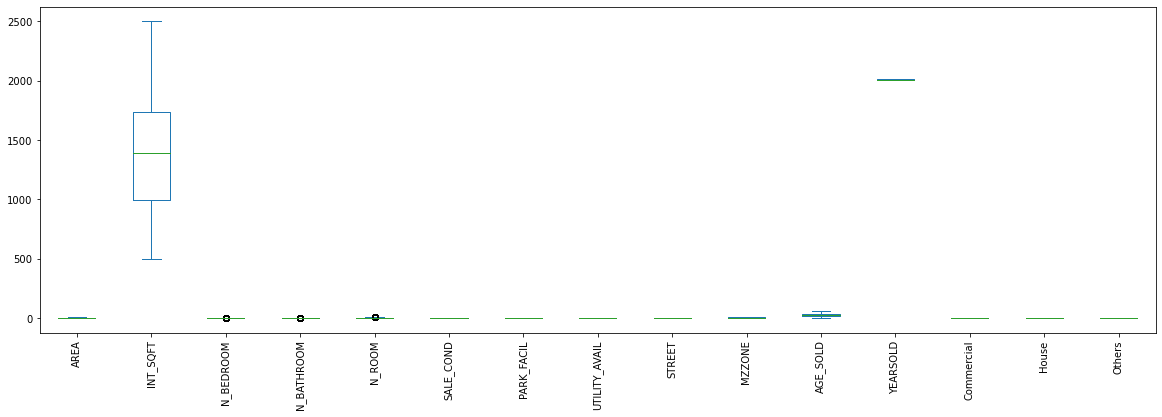

In [113]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,6), rot=90)
plt.show()

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

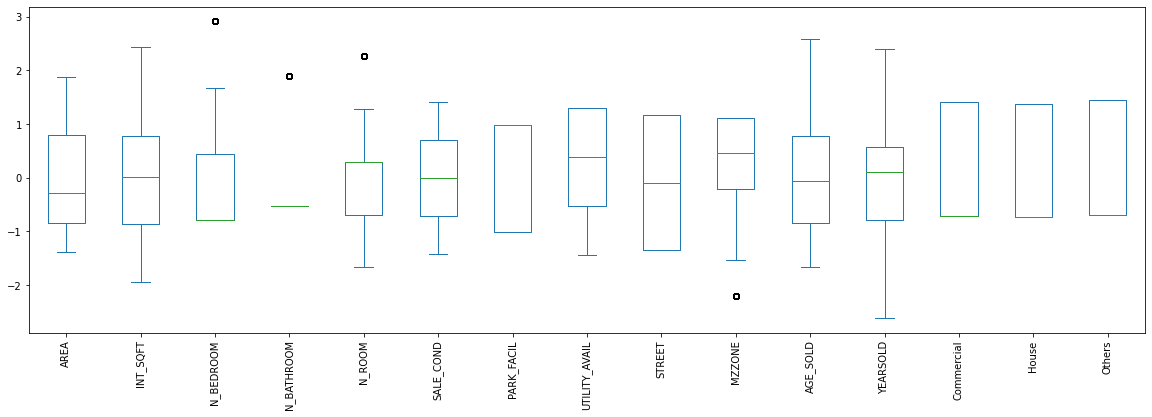

In [115]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)

X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,6), rot=90)
plt.show()

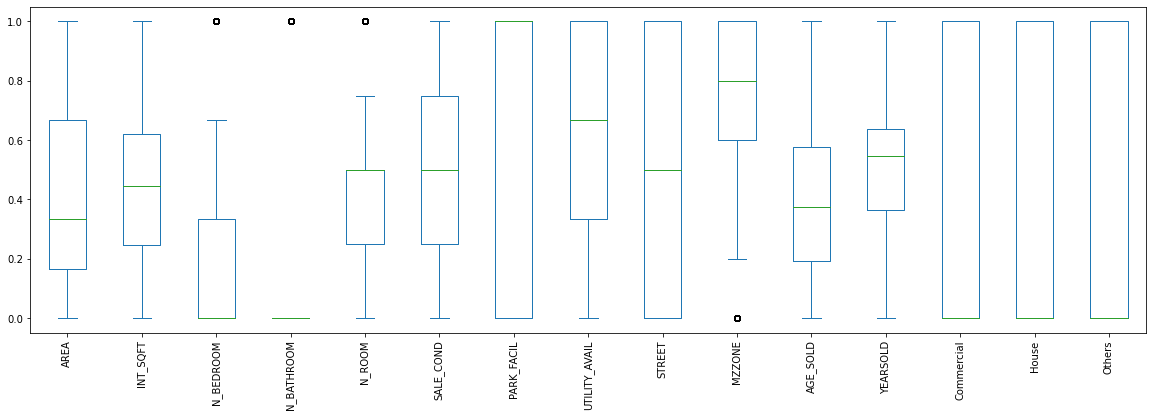

In [116]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)

X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,6), rot=90)
plt.show()

### Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [118]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, max_features ='sqrt')
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
r2_score(y_test, pred)

0.976726271514647

In [119]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, max_features ='sqrt')
rf.fit(X_train_ss, y_train)
pred = rf.predict(X_test_ss)
r2_score(y_test, pred)

0.9752977628398681

In [120]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, max_features ='sqrt')
rf.fit(X_train_mm, y_train)
pred = rf.predict(X_test_mm)
r2_score(y_test, pred)

0.9753593599939817

In [121]:
rfdata = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
rfdata

,Actual,Predicted
2784,12151100,1.136679e+07
3532,10081500,1.118853e+07
5968,5358500,6.409013e+06
5747,12584475,1.216894e+07
2614,8555550,8.888485e+06
...,...,...
2525,13957390,1.335005e+07
1886,13709595,1.242221e+07
7015,5853875,5.842793e+06
880,10930680,1.051725e+07


In [122]:
rfm = metrics.r2_score(y_test, pred)

### Decision Tree

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

In [124]:
for depth in [1,3,5,10,20,30,45,50,60,70,80,90,100]:
    dt = DecisionTreeRegressor(max_depth=depth, random_state= 11)
    dt.fit(X_train, y_train)
    trainaccuracy = r2_score(y_train, dt.predict(X_train))
    dt = DecisionTreeRegressor(max_depth=depth)
    valaccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring=make_scorer(r2_score))
    print(depth, trainaccuracy, np.mean(valaccuracy))

1 0.36164636525484983 0.35744467076938885
3 0.8029008010382961 0.8003017329655236
5 0.9210086012329859 0.9134659137515151
10 0.99025208541762 0.9676401336953665
20 0.9999999809596134 0.968646731872784
30 1.0 0.9680715020814448
45 1.0 0.9680114574877626
50 1.0 0.968177279744688
60 1.0 0.9678084349580999
70 1.0 0.9679117571278401
80 1.0 0.9677930548836583
90 1.0 0.968052054212136
100 1.0 0.9681827260300789


depth = 60, Cross_val_score reached is 0.9676934281314631

In [126]:
dt = DecisionTreeRegressor(max_depth=40)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40)

In [127]:
import matplotlib.pyplot as plt
dt = DecisionTreeRegressor(max_depth=60)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=60)

In [128]:
y_pred_tree = dt.predict(X_test)
y_pred_tree

array([11077460., 10173350.,  7051750., ...,  5308500., 11252380.,
       13124770.])

In [129]:
dtdata = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree})
dtdata

,Actual,Predicted
2784,12151100,11077460.0
3532,10081500,10173350.0
5968,5358500,7051750.0
5747,12584475,12863400.0
2614,8555550,8986690.0
...,...,...
2525,13957390,13330820.0
1886,13709595,12412600.0
7015,5853875,5308500.0
880,10930680,11252380.0


In [130]:
dtm = metrics.r2_score(y_test, y_pred_tree)

## KNN

In [131]:
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score

In [132]:
from sklearn.model_selection import cross_val_predict

In [133]:
from sklearn.metrics import mean_squared_error, r2_score
#print(mean_squared_error(y, y_pred))

R2_score k: 1 is 0.11974469182985792
R2_score k: 2 is 0.32391623740140174
R2_score k: 3 is 0.3831795908604856
R2_score k: 4 is 0.40257666350727883
R2_score k: 5 is 0.42190025195954817
R2_score k: 6 is 0.42859851027911733
R2_score k: 7 is 0.42963025154496914
R2_score k: 8 is 0.4316735327048268
R2_score k: 9 is 0.4298467705965734
R2_score k: 10 is 0.4274468472812002
R2_score k: 11 is 0.43340320036037927
R2_score k: 12 is 0.4355921652735303
R2_score k: 13 is 0.4355707453043066
R2_score k: 14 is 0.43620790579770186
R2_score k: 15 is 0.4370289371705215
R2_score k: 16 is 0.4404572073377885
R2_score k: 17 is 0.44081773483928843
R2_score k: 18 is 0.4393388234717045
R2_score k: 19 is 0.4392261134910016
R2_score k: 20 is 0.4378495391462487


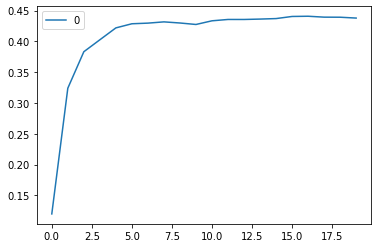

In [134]:
r2score =[]
for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    rsquare = r2_score(y_test, pred)
    r2score.append(rsquare)
    print(f'R2_score k: {k} is {rsquare}')
    
    
grph = pd.DataFrame(r2score)
grph.plot()
plt.show()
#    y_pred = cross_val_predict(knn, X,y, cv=2)
#    error.append(mean_squared_error(y, y_pred))

R2_score k: 1 is 0.11974469182985792
R2_score k: 2 is 0.32391623740140174
R2_score k: 3 is 0.3831795908604856
R2_score k: 4 is 0.40257666350727883
R2_score k: 5 is 0.42190025195954817
R2_score k: 6 is 0.42859851027911733
R2_score k: 7 is 0.42963025154496914
R2_score k: 8 is 0.4316735327048268
R2_score k: 9 is 0.4298467705965734
R2_score k: 10 is 0.4274468472812002
R2_score k: 11 is 0.43340320036037927
R2_score k: 12 is 0.4355921652735303
R2_score k: 13 is 0.4355707453043066
R2_score k: 14 is 0.43620790579770186
R2_score k: 15 is 0.4370289371705215
R2_score k: 16 is 0.4404572073377885
R2_score k: 17 is 0.44081773483928843
R2_score k: 18 is 0.4393388234717045
R2_score k: 19 is 0.4392261134910016
R2_score k: 20 is 0.4378495391462487


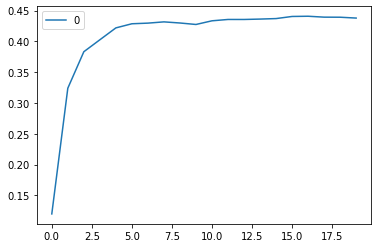

In [135]:
r2score =[]
for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    rsquare = r2_score(y_test, pred)
    r2score.append(rsquare)
    print(f'R2_score k: {k} is {rsquare}')
    
    
grph = pd.DataFrame(r2score)
grph.plot()
plt.show()

R2_score k: 1 is 0.9178291635092302
R2_score k: 2 is 0.9407705589250649
R2_score k: 3 is 0.9447468515272854
R2_score k: 4 is 0.945984236170137
R2_score k: 5 is 0.9474195616497086
R2_score k: 6 is 0.9468069476978371
R2_score k: 7 is 0.943640219757762
R2_score k: 8 is 0.9417433394619639
R2_score k: 9 is 0.9402314825167304
R2_score k: 10 is 0.9397031153142877
R2_score k: 11 is 0.9378642090000476
R2_score k: 12 is 0.9373423637524041
R2_score k: 13 is 0.9360345207652454
R2_score k: 14 is 0.9350941750417963
R2_score k: 15 is 0.9345737397511017
R2_score k: 16 is 0.9336656550901742
R2_score k: 17 is 0.9319362873766568
R2_score k: 18 is 0.9304248442673145
R2_score k: 19 is 0.9294579933310749
R2_score k: 20 is 0.9286778950953511


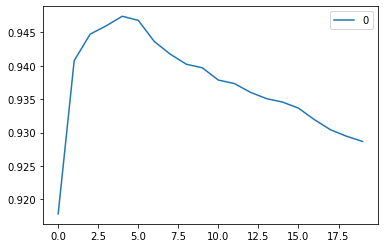

In [136]:
r2score =[]
for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train_ss, y_train)
    pred = knn.predict(X_test_ss)
    rsquare = r2_score(y_test, pred)
    r2score.append(rsquare)
    print(f'R2_score k: {k} is {rsquare}')
    
    
grph = pd.DataFrame(r2score)
grph.plot()
plt.show()

In [137]:
from math import sqrt

R2_score k: 1 is 0.11974469182985792
R2_score k: 2 is 0.32391623740140174
R2_score k: 3 is 0.3831795908604856
R2_score k: 4 is 0.40257666350727883
R2_score k: 5 is 0.42190025195954817
R2_score k: 6 is 0.42859851027911733
R2_score k: 7 is 0.42963025154496914
R2_score k: 8 is 0.4316735327048268
R2_score k: 9 is 0.4298467705965734
R2_score k: 10 is 0.4274468472812002
R2_score k: 11 is 0.43340320036037927
R2_score k: 12 is 0.4355921652735303
R2_score k: 13 is 0.4355707453043066
R2_score k: 14 is 0.43620790579770186
R2_score k: 15 is 0.4370289371705215
R2_score k: 16 is 0.4404572073377885
R2_score k: 17 is 0.44081773483928843
R2_score k: 18 is 0.4393388234717045
R2_score k: 19 is 0.4392261134910016
R2_score k: 20 is 0.4378495391462487


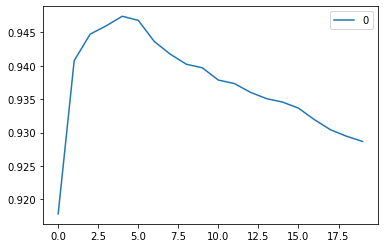

In [138]:
rmse =[]
for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    rsquare = r2_score(y_test, pred)
    rmse.append(rsquare)
    print(f'R2_score k: {k} is {rsquare}')
    
    
grph = pd.DataFrame(r2score)
grph.plot()
plt.show()

In [139]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'R_2score: {metrics.r2_score(y_test, y_pred)}')

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train_mm, y_train)
y_pred = knn.predict(X_test_mm)
print(f'R_2score: MinMaxScaler {metrics.r2_score(y_test, y_pred)}')

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train_ss, y_train)
y_pred = knn.predict(X_test_ss)
print(f'R_2score: StdScalar {metrics.r2_score(y_test, y_pred)}')
knnm =metrics.r2_score(y_test, y_pred)

R_2score: 0.4164444049023519
R_2score: MinMaxScaler 0.841836587007711
R_2score: StdScalar 0.8845827544803836


### XGBoost

In [140]:
#!pip install xgboost --quiet

In [141]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [142]:
for lr in [0.1, 0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.8,0.9,1,1.1,1.2,1.5,2]:
    model = xgb.XGBRegressor(learning_rate =lr, n_estimators =100, verbosity=0)
    model.fit(X_train, y_train)
    print(f'Learning rate: {lr}; Train Score: {model.score(X_train, y_train)}; Test Score: {model.score(X_test, y_test)}')

Learning rate: 0.1; Train Score: 0.9989077597368617; Test Score: 0.9969680232791506
Learning rate: 0.11; Train Score: 0.9989491836479517; Test Score: 0.9969950006667992
Learning rate: 0.12; Train Score: 0.9990155437039928; Test Score: 0.9970470702069665
Learning rate: 0.13; Train Score: 0.9990693477652258; Test Score: 0.9969305955176676
Learning rate: 0.14; Train Score: 0.999173537942216; Test Score: 0.9971816852029848
Learning rate: 0.15; Train Score: 0.9991673456139267; Test Score: 0.9972185790655552
Learning rate: 0.2; Train Score: 0.9992770029966961; Test Score: 0.9971334949480919
Learning rate: 0.5; Train Score: 0.9994587936770228; Test Score: 0.9932081603744779
Learning rate: 0.7; Train Score: 0.9995128143193819; Test Score: 0.9884917288314453
Learning rate: 0.8; Train Score: 0.9996360317942565; Test Score: 0.9881517934813031
Learning rate: 0.9; Train Score: 0.9996465611965613; Test Score: 0.9850301914747153
Learning rate: 1; Train Score: 0.9996270181038849; Test Score: 0.9811757

#### Learning rate: 0.15; Train Score: 0.9992445546534541; Test Score: 0.9970182895949284

In [143]:
xg = xgb.XGBRegressor(learning_rate =0.15, n_estimators=100, verbosity =0)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
print(f'R2_score {metrics.r2_score(y_test, y_pred)}')
print(f'Learning_rate: {lr}; Train Score:{xg.score(X_train, y_train)}; Test Score:{xg.score(X_test, y_test)}')

R2_score 0.9972185790655552
Learning_rate: 2; Train Score:0.9991673456139267; Test Score:0.9972185790655552


In [144]:
xg = xgb.XGBRegressor(learning_rate =0.15, n_estimators=100, verbosity =0)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
print(f'R2_score {metrics.r2_score(y_test, y_pred)}')

xg = xgb.XGBRegressor(learning_rate =0.15, n_estimators=100, verbosity =0)
xg.fit(X_train_mm, y_train)
y_pred = xg.predict(X_test_mm)
print(f'R2_score {metrics.r2_score(y_test, y_pred)}')

xg = xgb.XGBRegressor(learning_rate =0.15, n_estimators=100, verbosity =0)
xg.fit(X_train_ss, y_train)
y_pred = xg.predict(X_test_ss)
print(f'R2_score {metrics.r2_score(y_test, y_pred)}')
xgm = metrics.r2_score(y_test, y_pred)

R2_score 0.9972185790655552
R2_score 0.9972187462068394
R2_score 0.9972204670907483


In [145]:
xg_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xg_data

,Actual,Predicted
2784,12151100,12010205.0
3532,10081500,10517185.0
5968,5358500,6002808.0
5747,12584475,12551945.0
2614,8555550,8551621.0
...,...,...
2525,13957390,13884791.0
1886,13709595,13121797.0
7015,5853875,5965157.0
880,10930680,11041515.0


### With these Models run, we can get model predictions and use the best model.

In [146]:
print("All Models R2 values are: ")
print("-------------------------------------------")
print("Linear Regression Model: ", round((lrm*100),2),"%")
print("KNN Model: ", round((knnm*100),2),"%")
print("Decision Tree Model: ", round((dtm*100),2),"%")
print("Random Forest Model: ", round((rfm*100),2),"%")
print("XG BOOST Model: ", round((xgm*100),2),"%")

All Models R2 values are: 
-------------------------------------------
Linear Regression Model:  92.12 %
KNN Model:  88.46 %
Decision Tree Model:  96.89 %
Random Forest Model:  97.54 %
XG BOOST Model:  99.72 %
